In [1]:
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,Date,SPX,VIX
0,12/31/1987,247.09,NaN
1,01/04/1988,255.94,NaN
2,01/05/1988,258.63,NaN
3,01/06/1988,258.89,NaN
4,01/07/1988,261.07,NaN
...,...,...,...
8301,12/08/2020,3702.25,20.68
8302,12/09/2020,3672.82,22.27
8303,12/10/2020,3668.10,22.52
8304,12/11/2020,3663.46,23.31


In [4]:
data['SPX_ath'] = data['SPX'].expanding().max()

In [5]:
data['SPX_dist'] = data['SPX_ath'] / data['SPX'] - 1

In [6]:
data.index = data['Date']

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8306 entries, 12/31/1987 to 12/14/2020
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      8306 non-null   datetime64[ns]
 1   SPX       8306 non-null   float64       
 2   VIX       7800 non-null   float64       
 3   SPX_ath   8306 non-null   float64       
 4   SPX_dist  8306 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 389.3+ KB


In [9]:
data['year'] = data['Date'].apply(lambda x: x.year)

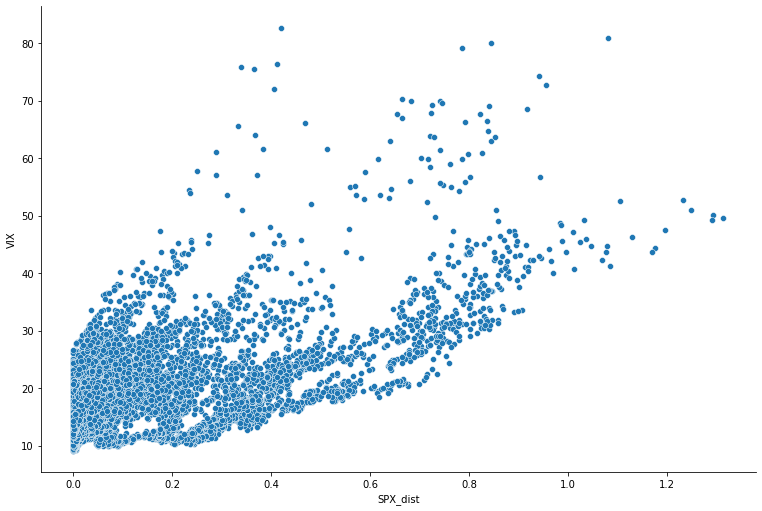

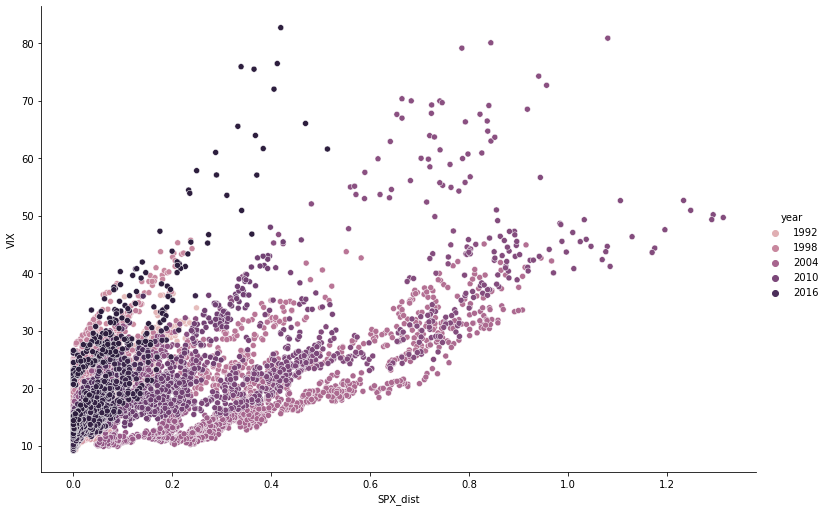

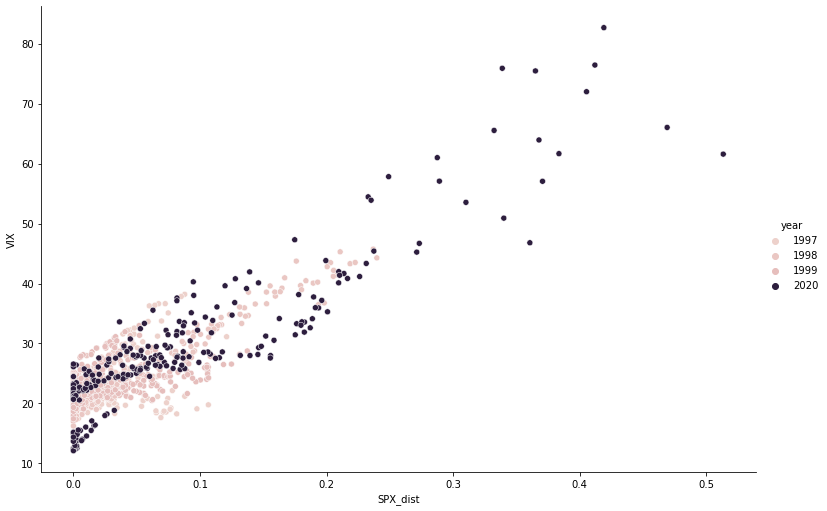

In [10]:
sns.relplot(kind='scatter', x='SPX_dist', y='VIX', height=7, aspect=1.5, data=data)
sns.relplot(kind='scatter', x='SPX_dist', y='VIX', hue='year', height=7, aspect=1.5, data=data)
sns.relplot(kind='scatter', x='SPX_dist', y='VIX', hue='year', height=7, aspect=1.5, data=data.loc[(data['year'] == 2020)|((data['year'] < 2000) & (data['year'] >= 1997)),:])

In [11]:
ath_vix20 = data.loc[(data['SPX_dist'] <= 0) & (data['VIX'] >= 20),:]

<AxesSubplot:>

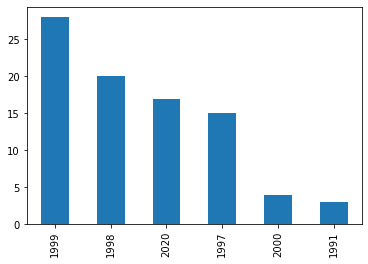

In [12]:
ath_vix20['year'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='year'>

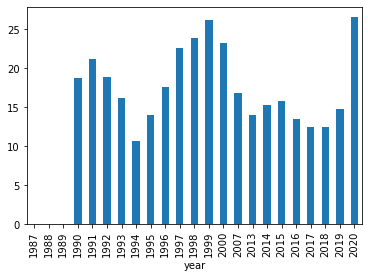

In [13]:
data[data['SPX_dist'] == 0].groupby('year').max()['VIX'].plot(kind='bar')